In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

D:\anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")
train_df.drop(['id'],axis=1, inplace=True)
test_df.drop(['id'],axis=1, inplace=True)

In [3]:
train_df['label'].value_counts()

0    58
1    29
Name: label, dtype: int64

In [4]:
train_df.isna().sum()

MO HLADR+ MFI (cells/ul)    1
Neu CD64+MFI (cells/ul)     1
CD3+T (cells/ul)            0
CD8+T (cells/ul)            0
CD4+T (cells/ul)            0
NK (cells/ul)               0
CD19+ (cells/ul)            0
CD45+ (cells/ul)            0
Age                         0
Sex 0M1F                    0
Mono CD64+MFI (cells/ul)    1
label                       0
dtype: int64

In [6]:
### problem come from only one data, remove it 
train_df[train_df["MO HLADR+ MFI (cells/ul)"].isna() == True]

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
39,NaN,NaN,1336.54,739.71,550.3,68.46,192.07,1615.68,21,0,NaN,0


In [7]:
train_df.dropna(inplace=True)

In [8]:
### normalization 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
mm = MinMaxScaler()
cols = train_df.columns
train_df[cols] = mm.fit_transform(train_df[cols])
cols = test_df.columns
test_df[cols] = mm.fit_transform(test_df[cols])

In [9]:
##### sex is categorical featuers, one-hot
train_df['Sex 0M1F'] = train_df['Sex 0M1F'].astype('object')
test_df['Sex 0M1F'] = test_df['Sex 0M1F'].astype('object')
train_df = pd.get_dummies(train_df)
test_df  = pd.get_dummies(test_df)

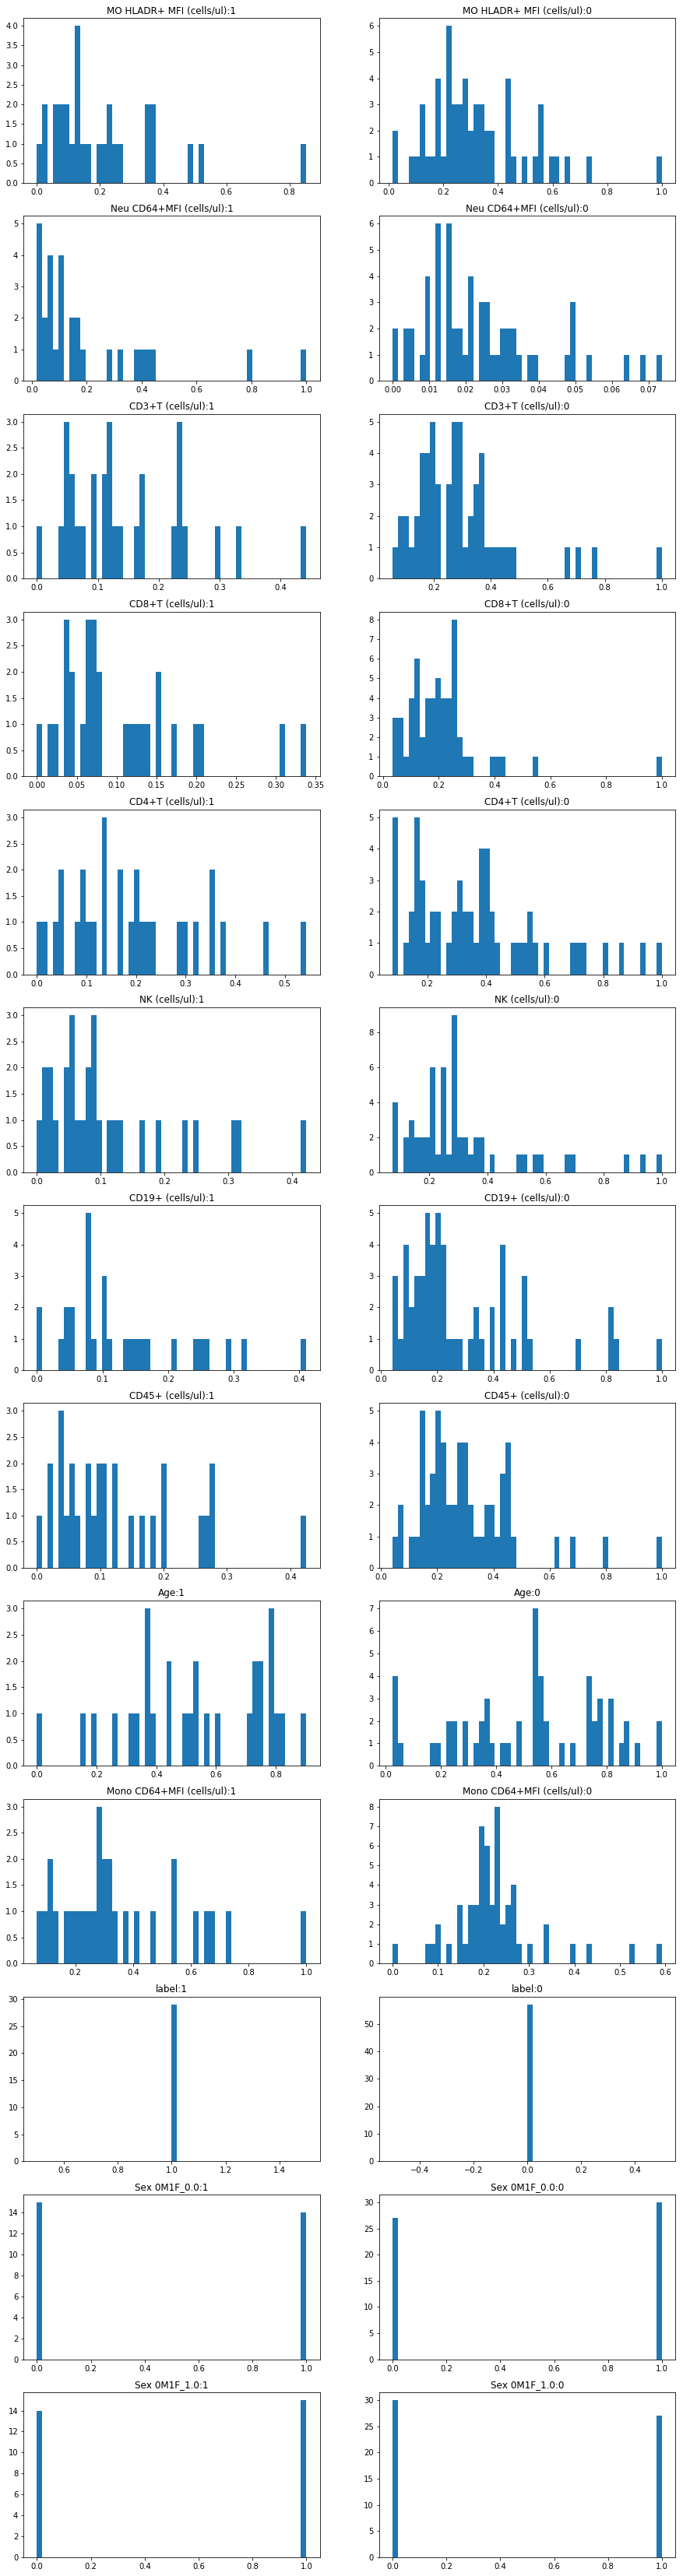

In [10]:
train_df
fig = plt.figure(figsize=(15,60))
rows = len(train_df.columns)
index = 0
bins = 50
for col in train_df.columns:
    ax = fig.add_subplot(rows, 2, index * 2 + 1)
    x1 = train_df[train_df['label'] == 1][col] 
    ax.hist(x1,bins=bins)
    ax.set_title(col + ":1")
    
    ax = fig.add_subplot(rows, 2, index * 2 + 2)
    x1 = train_df[train_df['label'] == 0][col] 
    ax.hist(x1,bins=bins)
    ax.set_title(col + ":0")
    index += 1

In [24]:
import math
add_features = ['MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)', 'CD8+T (cells/ul)', 'NK (cells/ul)']
for feature in add_features:
    
#     train_df['log_' + feature] = train_df[feature].apply(lambda x: math.log(x))
    train_df['root_' + feature] = train_df[feature].apply(lambda x: x ** 0.5)
    train_df['square_' + feature] = train_df[feature].apply(lambda x: x ** 2)
    
#     test_df['log_' + feature] = train_df[feature].apply(lambda x: math.log(x))
    test_df['root_' + feature] = test_df[feature].apply(lambda x: x ** 0.5)
    test_df['square_' + feature] = test_df[feature].apply(lambda x: x ** 2)

In [25]:
train_df.columns

Index(['MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)',
       'CD3+T (cells/ul)', 'CD8+T (cells/ul)', 'CD4+T (cells/ul)',
       'NK (cells/ul)', 'CD19+ (cells/ul)', 'CD45+ (cells/ul)', 'Age',
       'Mono CD64+MFI (cells/ul)', 'label', 'Sex 0M1F_0.0', 'Sex 0M1F_1.0',
       'root_MO HLADR+ MFI (cells/ul)', 'square_MO HLADR+ MFI (cells/ul)',
       'root_Neu CD64+MFI (cells/ul)', 'square_Neu CD64+MFI (cells/ul)',
       'root_CD8+T (cells/ul)', 'square_CD8+T (cells/ul)',
       'root_NK (cells/ul)', 'square_NK (cells/ul)'],
      dtype='object')

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
mm = MinMaxScaler()
cols = train_df.columns
train_df[cols] = mm.fit_transform(train_df[cols])
cols = test_df.columns
test_df[cols] = mm.fit_transform(test_df[cols])

y = train_df['label']
X = train_df.drop(['label'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size  = 0.25)

In [42]:
test_label = pd.read_csv("fe_arthur.csv")

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print("Accuracy of LR in Training: %f" % lr.score(X_train, Y_train))
print("Accuracy of LR in Test: %f" % lr.score(X_test, Y_test))

Accuracy of LR in Training: 0.921875
Accuracy of LR in Test: 0.772727


In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
print("Accuracy of LR in Training: %f" % lr.score(X_train, Y_train))
print("Accuracy of LR in Test: %f" % lr.score(X_test, Y_test))
print("Accuracy of LR in All: %f" % lr.score(X, y))

Accuracy of LR in Training: 0.953125
Accuracy of LR in Test: 0.818182
Accuracy of LR in All: 0.918605


In [35]:
ss = pd.read_csv("sample_submission.csv")
myss = ss.copy()
myss['label'] = lr.predict(test_df).astype('int64')
myss.to_csv("lr.csv",index = False)

In [55]:
lr.coef_

array([[-0.82907041,  1.15918977, -0.52695743, -0.41529139, -0.43392823,
        -0.89636762, -0.65241569, -0.69535045,  0.05259711,  0.78951336,
         0.16034098,  0.2823363 , -0.841623  , -0.48371312,  1.97824253,
         0.39041294, -0.54844994, -0.13233675, -1.17039437, -0.37297228]])

In [61]:
y1 = train_df['label']
X1 = train_df.drop(['label'],axis=1)
X1 = X1.drop(['Age','Sex 0M1F_0.0','Sex 0M1F_1.0'], axis = 1)
Y_test1 = test_df.drop(['Age','Sex 0M1F_0.0','Sex 0M1F_1.0'], axis = 1)
    
X_train, X_test, Y_train, Y_test = train_test_split(X1,y, test_size  = 0.25)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X1,y)
print("Accuracy of LR in Training: %f" % lr.score(X_train, Y_train))
print("Accuracy of LR in Test: %f" % lr.score(X_test, Y_test))
print("Accuracy of LR in All: %f" % lr.score(X1, y))

Accuracy of LR in Training: 0.937500
Accuracy of LR in Test: 0.909091
Accuracy of LR in All: 0.930233


In [37]:
myss.to_csv("fe_lr.csv",index = False)